In [71]:
import csv
import itertools
import pandas as pd
import numpy as np

## my question: what are possible correlations amount and time of donation, and what are their relative impacts?

txt_file = r"/Users/alexalmond/CampaignFinance/indiv16/itcont.txt"
csv_file = r"/Users/alexalmond/CampaignFinance/indiv16/itcont.csv"

indv_2commitee_header = ['CMTE_ID', 'AMNDT_IND', 'RPT_TP', 'TRANSACTION_PGI', 'IMAGE_NUM', 'TRANSACTION_TP', 'ENTITY_TP' ,'NAME', 'CITY', 'STATE', 'ZIP_CODE', 'EMPLOYER', 'OCCUPATION', 'TRANSACTION_DT', 'TRANSACTION_AMT',
                         'OTHER_ID', 'TRAN_ID', 'FILE_NUM', 'MEMO_CD', 'MEMO_TEXT', 'SUB_ID']


cmite_cont2_TH_txt = r"/Users/alexalmond/CampaignFinance/c_to_candidates.txt"
cmite_cont2_TH_csv = r"/Users/alexalmond/CampaignFinance/c_to_candidates.csv"

cmite_cont2_TH_header = ['CMTE_ID',	'MNDT_IND',	'RPT_TP', 'TRANSACTION_PGI', 'IMAGE_NUM', 'TRANSACTION_TP',	'ENTITY_TP', 'NAME',
                         'CITY',	'STATE', 'ZIP_CODE', 'EMPLOYER', 'OCCUPATION',	'TRANSACTION_DT',	'TRANSACTION_AMT',	'OTHER_ID',	'CAND_ID',	'TRAN_ID',	'FILE_NUM',	'MEMO_CD',	'MEMO_TEXT', 'SUB_ID']


commitees_txt = r"/Users/alexalmond/CampaignFinance/commitees.txt"
commitees_csv = r"/Users/alexalmond/CampaignFinance/commitees.csv"


Trump_ID = "P80001571"
Clinton_ID = "P00003392"

#converts the txt FEC files to CSV files
#also, adds headers to the converted CSV files and gives them header lookup power

def dictify(txt, csvv, fieldnames, cand, cID1, cID2):

    in_txt = csv.reader(open(txt, "rb"), delimiter = '|')

    dictwriter = csv.DictWriter(open(csvv, 'wb'), fieldnames = fieldnames)

    dictwriter.writeheader()

    dictionary = {}

    for row in in_txt:
        if cand != 0 and len(row[13]) >= 3:
            if row[cand] == cID1:
                dictionary = {}
                i = 0
                for column in row:
                    dictionary[fieldnames[i]] = column
                    i += 1
                dictwriter.writerow(dictionary)
            elif row[cand] == cID2:
            	dictionary = {}
                i = 0
                for column in row:
                    dictionary[fieldnames[i]] = column
                    i += 1
                dictwriter.writerow(dictionary)

dictify(cmite_cont2_TH_txt, cmite_cont2_TH_csv, cmite_cont2_TH_header, 16, 'P80001571', 'P00003392')
    
 

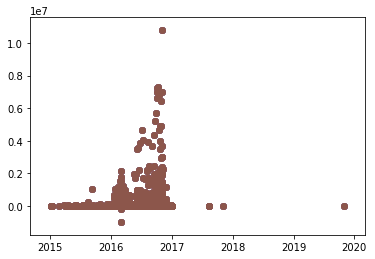

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


# plot of amount versus time donated

datafy = pd.read_csv("/Users/alexalmond/CampaignFinance/c_to_candidates.csv", parse_dates=["TRANSACTION_DT"])


date_array = np.array(datafy["TRANSACTION_DT"])
amount_array = np.array(datafy["TRANSACTION_AMT"])

parse_date = lambda date: dt.datetime.strptime(date, "%d%m%Y'")

def convert(date):
    new_date = ''
    if date[0:2] == '01':
        new_date = date[2:4]+ 'JAN' + date[4:]
    elif date[0:2] == '02':
        new_date = date[2:4]+ 'FEB' + date[4:]
    elif date[0:2] == '03':
        new_date = date[2:4]+ 'MAR' + date[4:]
    elif date[0:2] == '04':
        new_date = date[2:4]+ 'APR' + date[4:]
    elif date[0:2] == '05':
        new_date = date[2:4]+ 'MAY' + date[4:]
    elif date[0:2] == '06':
        new_date = date[2:4]+ 'JUN' + date[4:]
    elif date[0:2] == '07':
        new_date = date[2:4]+ 'JUL' + date[4:]
    elif date[0:2] == '08':
        new_date = date[2:4]+ 'AUG' + date[4:]
    elif date[0:2] == '09':
        new_date = date[2:4]+ 'SEP' + date[4:]
    elif date[0:2] == '10':
        new_date = date[2:4]+ 'OCT' + date[4:]
    elif date[0:2] == '11':
        new_date = date[2:4]+ 'NOV' + date[4:]
    elif date[0:2] == '12':
        new_date = date[2:4]+ 'DEC'+ date[4:]
    return new_date
    
parse_date = lambda date: dt.datetime.strptime(date, '%d%b%Y')

count = 0
for elem in date_array:
    if elem != 'nan':
        count += 1

for i in range(len(date_array)): 
    date_array[i] = parse_date(convert(date_array[i]))
    
plt.scatter(date_array, amount_array)

plt.show()